Clustering

하나의 데이터셋에 **다양한 알고리즘**을 적용하여 클러스터링을 진행하고, 결과를 시각화하여 확인해봅시다!

In [1]:
## 필요한 라이브러리를 임포트합니다.

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler #Normalization
from sklearn.metrics import silhouette_score #Silhouette Coefficient

In [2]:
## 시각화 관련 라이브러리를 임포트합니다.

from matplotlib import pyplot as plt
import seaborn as sns

###데이터

사용할 데이터: 'Mall_customers.csv'

주어진 데이터는 마켓 운영자가 보유하고 있는 소비자의 특성을 나타낸 데이터입니다.




*   CustomerID: 소비자 ID
*   Genre: 해당 소비자의 성별
*   Age: 해당 소비자의 연령
*   Annual Income: 해당 소비자의 연간 수입
*   Spending Score: 해당 소비자의 소비 지수. 소비자 태도나 구매 이력 등을 바탕으로 계산되었다.

데이터를 불러옵니다.

In [3]:
## drive에 있는 데이터셋을 불러오기 위해 드라이브와 연동을 합니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## 'Mall_Customers' 데이터의 위치를 불러와 저장합니다.

data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
column = data.columns.values.tolist()
column

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Annual Income과 Spending Score 를 각각 x, y로 불러와 관계를 살펴보고자 합니다.

In [7]:
## 필요한 데이터만 추출합니다.

data_x = data[['Annual Income (k$)','Spending Score (1-100)']]
data_x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
feature_name = data_x.columns.to_list()
feature_name

['Annual Income (k$)', 'Spending Score (1-100)']

클러스터링을 하기 전 먼저 데이터셋의 분포가 어떠한지 확인해봅시다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mall_Customers Dataset')

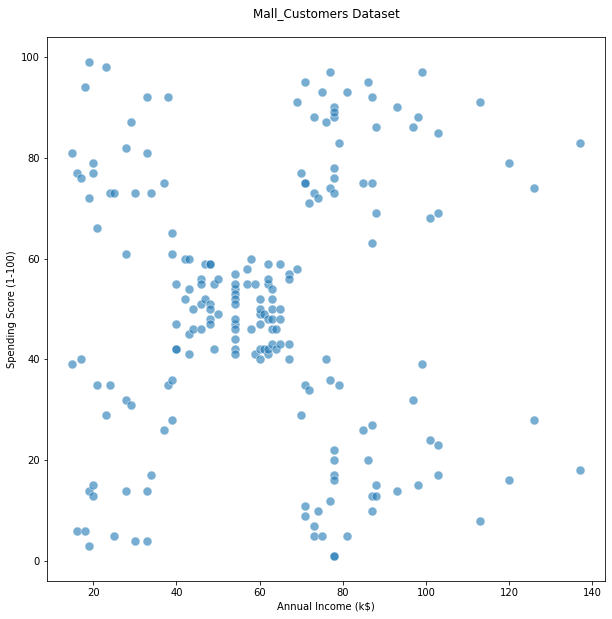

In [9]:
## 데이터의 분포 확인 

plt.figure(figsize = (10, 10))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', alpha = 0.6, s = 80, data = data)
plt.title('Mall_Customers Dataset', pad = 20)

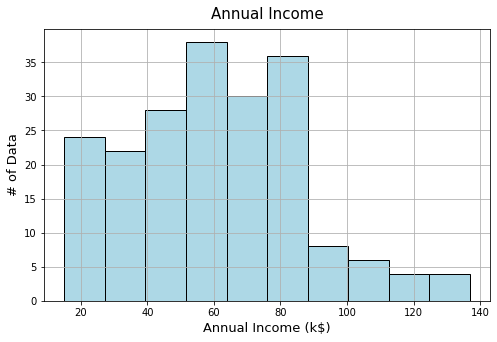

In [10]:
## Annual Income

plt.figure(figsize = (8,5))
plt.title('Annual Income',fontsize = 15, pad = 10)
plt.xlabel('Annual Income (k$)', fontsize = 13)
plt.ylabel('# of Data', fontsize = 13)
plt.grid(True)
plt.hist(data['Annual Income (k$)'], color = 'lightblue', edgecolor = 'k')
plt.show()

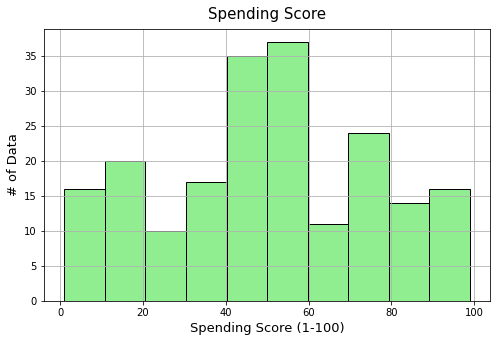

In [11]:
## Spending Score

plt.figure(figsize = (8,5))
plt.title('Spending Score', fontsize = 15, pad = 10)
plt.xlabel('Spending Score (1-100)',fontsize = 13)
plt.ylabel('# of Data', fontsize = 13)
plt.grid(True)
plt.hist(data['Spending Score (1-100)'], color = 'lightgreen', edgecolor = 'k')
plt.show()

연간 수입과 소비 지수는 단위가 다르기 때문에 scaling을 통해 단위를 맞춰주는 작업이 필요합니다.

정규화로 feature normalization을 진행하겠습니다.

In [12]:
data_x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
## Feature Normalization

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_x)
scaled_data = pd.DataFrame(scaled_data, columns = data_x.columns)
scaled_data

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


###K-means Clustering

1) K-means 클러스터링으로 군집화를 진행해 보겠습니다.



---



사이킷런에서 K-means Clustering 구현 방법은 https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 를 참고해주세요.

In [14]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import KMeans

K-means 는 다른 클러스터링 알고리즘과는 다르게 사전에 군집 수 K를 정해야 합니다. Elbow method를 적용해 최적의 군집 수 K를 찾아봅시다.

####최적의 군집 수 k 찾기

In [15]:
## 필요한 라이브러리를 임포트합니다.

from yellowbrick.cluster import KElbowVisualizer #elbow method

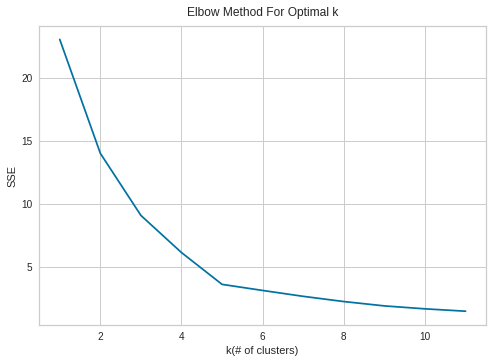

In [16]:
## Elbow method의 x값은 군집 수, y값은 원하는 지표 (내부평가) 사용이 가능합니다.
# 가장 구현이 간편한 SSE를 내부 평가 지표로 삼아 구현해봅시다.

sse = []
K = range(1, 12)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(scaled_data)
  sse.append(km.inertia_)

plt.plot(K, sse)
plt.xlabel('k(# of clusters)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k', pad = 10)
plt.show()

해당 그래프에서 elbow point는 k=5에서 형성됩니다.

그러나 SSE는 군집 내 분산 최소화만 고려하는 지표였습니다. 군집 간 분산 최대화까지 하는 실루엣 계수를 적용해 elbow point를 찾아보고, SSE와 비교해봅시다.



---



실루엣 계수를 활용한 elbow method 구현 방법은 https://www.scikit-yb.org/en/latest/api/cluster/elbow.html 를 참고해주세요.

(실루엣 계수에 대한 설명은 https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient 를 참고해주세요.)

In [17]:
model = KMeans()

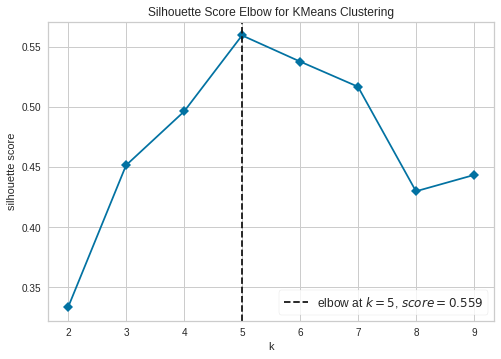

In [18]:
# 실루엣 계수는 '2 <= # of labels <= (# of samples) - 1' 일 때에만 정의됩니다.
elbowvisualizer = KElbowVisualizer(model, k = (2,10), metric = 'silhouette', timings = False)

elbowvisualizer.fit(scaled_data)  
elbowvisualizer.show()

실루엣 계수를 활용한 elbow method에서도 k=5에서 elbow point가 형성됨을 확인할 수 있습니다.

최적의 클러스터 수가 5라는 사실을 찾았으니, K-means 알고리즘을 데이터셋에 적용한 뒤 각각의 데이터가 어떠한 클러스터에 속하는지 알아보겠습니다.

####클러스터링 실행 

In [19]:
# 클러스터링을 진행할 데이터 확인

scaled_data

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [54]:
## 데이터에 scaling을 적용한 뒤에 클러스터링을 실행합니다.

km = KMeans(n_clusters=5)
y_km = km.fit_predict(scaled_data)
y_km

array([1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 0, 4, 2, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

위의 코드를 반복해서 돌려보면 돌릴 때마다 클러스터링 결과가 달라진다는 사실을 확인할 수 있습니다. 이는 매 시행마다 결과가 다르게 나오는 K-means Clustering의 특징을 보여줍니다. (동일한 학습 결과를 보고 싶다면 random_state를 이용하여 난수를 지정하면 됩니다.)



---



클러스터링 결과를 기존 데이터셋에 반영합니다.

In [21]:
data["Cluster"] = y_km
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


학습된 K-means 모델은 클러스터를 형성합니다. 학습 결과 생성된 클러스터의 중심점들의 좌푯값입니다.

In [22]:
centers = km.cluster_centers_
print(centers)

[[0.58638083 0.82783883]
 [0.33029751 0.49508692]
 [0.08792846 0.79962894]
 [0.6        0.16443149]
 [0.09265859 0.20319432]]


####시각화

클러스터링 결과를 시각화 해봅시다!

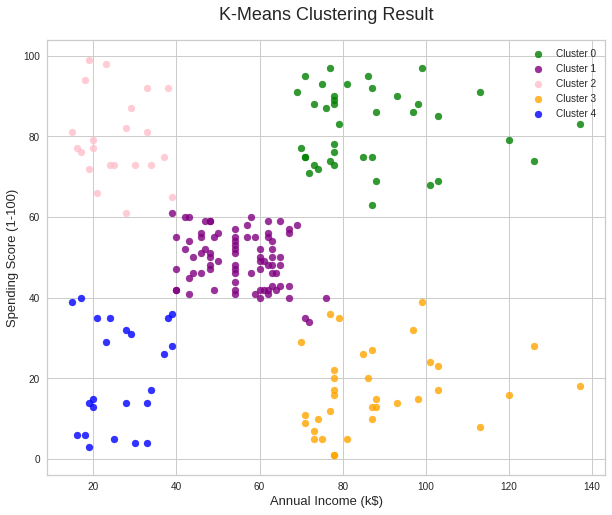

In [23]:
plt.figure(figsize = (10,8))
df1 = data[data.Cluster == 0]
df2 = data[data.Cluster == 1]
df3 = data[data.Cluster == 2]
df4 = data[data.Cluster == 3]
df5 = data[data.Cluster == 4]
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color = 'green', alpha = 0.8, label = 'Cluster 0')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color = 'purple', alpha = 0.8, label = 'Cluster 1')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color = 'pink', alpha = 0.8, label = 'Cluster 2')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color = 'orange', alpha = 0.8, label = 'Cluster 3')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color = 'blue', alpha = 0.8, label = 'Cluster 4')
plt.title('K-Means Clustering Result', fontsize = 18, pad = 20)
plt.xlabel('Annual Income (k$)', fontsize = 13)
plt.ylabel('Spending Score (1-100)', fontsize = 13)
plt.legend(fontsize = 10)
plt.grid(True)
plt.show()

클러스터링 결과를 분석해볼까요?

###Hierarchical Clustering

2) Hierarchical 클러스터링으로 군집화를 진행해 보겠습니다.



---



계층적 군집화를 위해 필요한 function은 https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html 를 참고해주세요.

In [24]:
## 다시 데이터를 가져 옵시다.

data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mall_Customers Dataset')

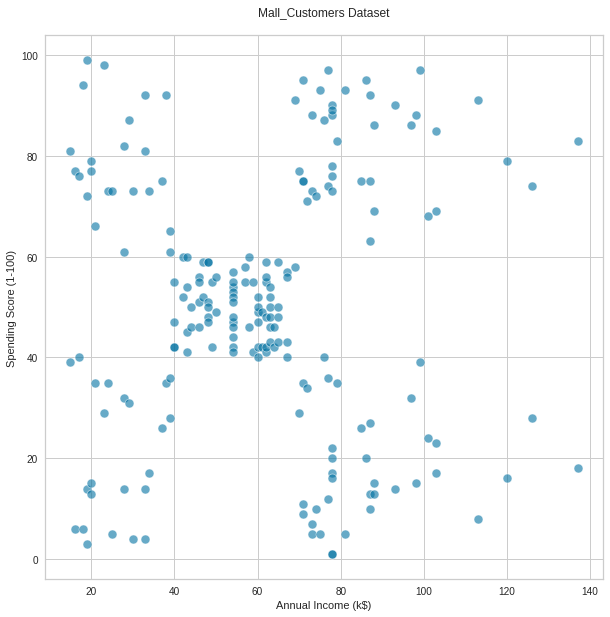

In [25]:
## 데이터의 분포 확인

plt.figure(figsize=(10, 10))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', alpha = 0.6, s = 80, data = data)
plt.title('Mall_Customers Dataset', pad = 20)

####덴드로그램

덴드로그램을 그려봅시다.

덴드로그램 구현 방법은 https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html 를 참고해주세요.

In [26]:
## 필요한 라이브러리를 임포트합니다.

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

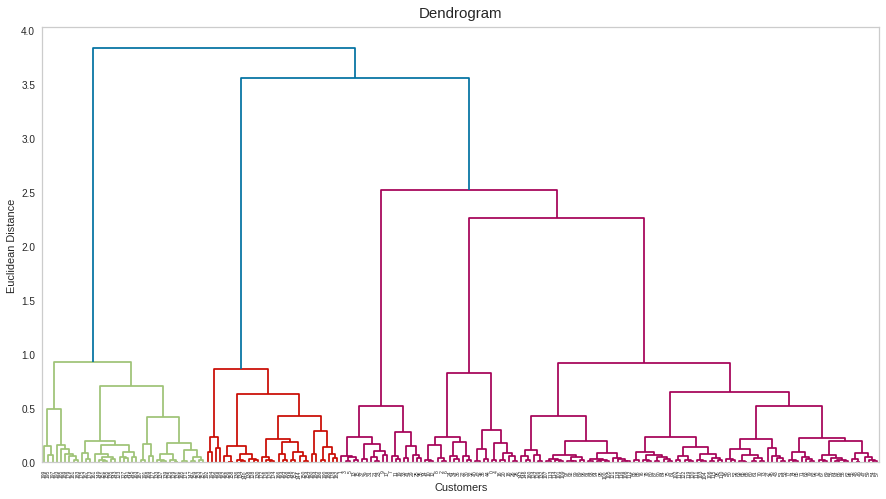

In [27]:
## 덴드로그램 그리기

X = scaled_data.values #scaled_data: 전체 데이터에서 Annual Income과 Spending Score를 추출한 뒤 scaling한 데이터

plt.figure(figsize = (15,8))
plt.title('Dendrogram', fontsize = 15, pad = 10)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #와드연결법을 이용하여 군집화
plt.show()

덴드로그램을 완성한 후, 계층적 군집화의 마무리는 적절한 선에서 잘라 클러스터 수를 결정하는 것이었습니다.

5개의 클러스터를 만들어 주는 선을 그어봅시다.

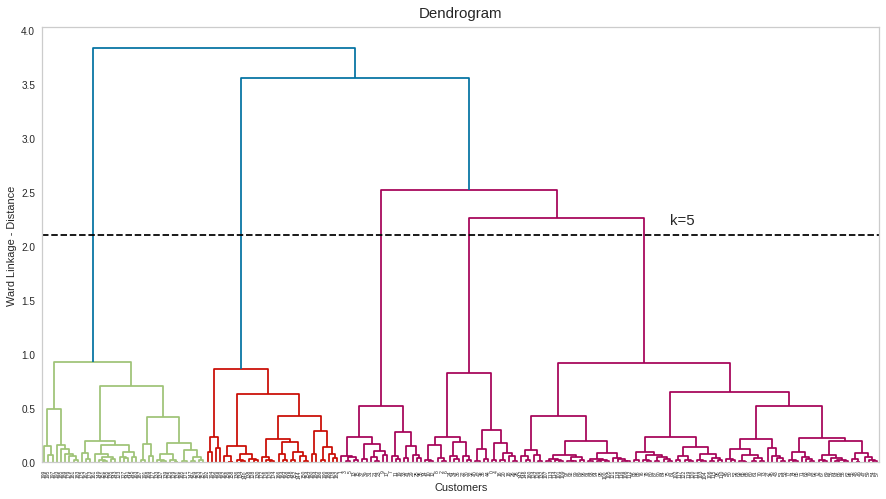

In [28]:
## 기존 코드
plt.figure(figsize = (15,8))
plt.title('Dendrogram', fontsize = 15, pad = 10)
plt.xlabel('Customers')
plt.ylabel('Ward Linkage - Distance')

## 클러스터 수가 5인 지점에서 자르기
plt.axhline(y = 2.1, linestyle = '--', color = 'black')
plt.text(x = 1500, y = 2.2, s = 'k=5', fontsize = 15)
plt.grid(False)

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

####클러스터링 실행

Agglomerative Clustering을 해보겠습니다. 

In [29]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import AgglomerativeClustering

In [30]:
agghc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_agghc = agghc.fit_predict(X)

In [56]:
y_agghc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

K-means 와는 다르게 클러스터링을 반복해도 결과가 변하지 않습니다.

####시각화

클러스터링 결과를 시각화 해봅시다!

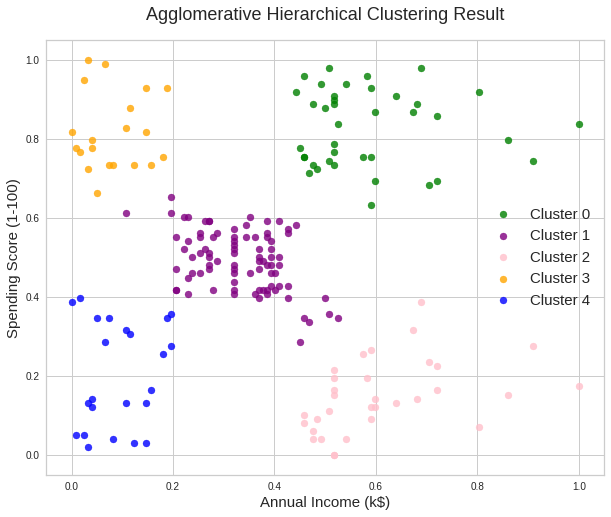

In [32]:
plt.figure(figsize = (10,8))
plt.scatter(X[y_agghc == 0, 0], X[y_agghc == 0, 1], color = 'green', alpha = 0.8, label = 'Cluster 0')
plt.scatter(X[y_agghc == 1, 0], X[y_agghc == 1, 1], color = 'purple', alpha = 0.8, label = 'Cluster 1')
plt.scatter(X[y_agghc == 2, 0], X[y_agghc == 2, 1], color = 'pink', alpha = 0.8, label = 'Cluster 2')
plt.scatter(X[y_agghc == 3, 0], X[y_agghc == 3, 1], color = 'orange', alpha = 0.8, label = 'Cluster 3')
plt.scatter(X[y_agghc == 4, 0], X[y_agghc == 4, 1], color = 'blue', alpha = 0.8, label = 'Cluster 4')
plt.title('Agglomerative Hierarchical Clustering Result', fontsize = 18, pad = 20)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.show()

클러스터링 결과를 분석해볼까요?

###DBSCAN

3) DBSCAN 클러스터링으로 군집화를 진행해 보겠습니다.



---



DBSCAN 구현 방법은 https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html 를 참고해주세요.

NearestNeighbors는 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html 를 참고해주세요.

In [33]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import DBSCAN
import sklearn.utils
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors

In [34]:
## 전체 데이터 확인

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
## 필요한 데이터 확인

scaled_data

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


####최적의 파라미터 찾기

세션에서 다룬 Heuristic Approach에 의하면, 2차원 데이터에서는 minPts를 4로 설정하는 것이 좋습니다. 최적의 eps를 찾아봅시다.

In [36]:
nb = NearestNeighbors(n_neighbors = 4).fit(scaled_data)

In [37]:
minPts = 4

In [38]:
#kneighbors([X, n_neighbors, return_distance]): Find the K-neighbors of a point.
distances, indices = nb.kneighbors(scaled_data)

In [39]:
distances #한 점이 minPts를 만족하는 점들과의 거리

array([[0.        , 0.0193098 , 0.06391148, 0.0843093 ],
       [0.        , 0.04163122, 0.04578372, 0.05358943],
       [0.        , 0.01639344, 0.03926558, 0.07447287],
       [0.        , 0.01308853, 0.03278689, 0.03861959],
       [0.        , 0.0193098 , 0.06064703, 0.07678026],
       [0.        , 0.01308853, 0.02662329, 0.03926558],
       [0.        , 0.01639344, 0.03169063, 0.05827735],
       [0.        , 0.05167464, 0.05784141, 0.11502859],
       [0.        , 0.03169063, 0.03926558, 0.05324658],
       [0.        , 0.04223481, 0.04398542, 0.05022776],
       [0.        , 0.01308853, 0.01308853, 0.07377049],
       [0.        , 0.03433807, 0.05167464, 0.13516858],
       [0.        , 0.01308853, 0.02040816, 0.06636296],
       [0.        , 0.02040816, 0.02662329, 0.03278689],
       [0.        , 0.01308853, 0.02040816, 0.06636296],
       [0.        , 0.02040816, 0.03861959, 0.03926558],
       [0.        , 0.02459016, 0.06064703, 0.06338125],
       [0.        , 0.06338125,

In [40]:
indices #해당 점에 대해 minPts를 만족하는 점들의 index

array([[  0,   4,  16,  20],
       [  1,   3,  15,   5],
       [  2,   6,   8,  22],
       [  3,   5,  13,  15],
       [  4,   0,  16,  20],
       [  5,   3,  13,  15],
       [  6,   2,   8,  22],
       [  7,  11,  19,  29],
       [  8,   6,   2,  22],
       [  9,  21,   5,  23],
       [ 10,  12,  14,  24],
       [ 11,  19,   7,  33],
       [ 12,  10,  14,  24],
       [ 13,  15,   5,   3],
       [ 14,  10,  12,  24],
       [ 15,  13,   3,   5],
       [ 16,  20,   4,  18],
       [ 17,   9,  21,  27],
       [ 18,  26,  28,  20],
       [ 19,  11,   7,  33],
       [ 20,  16,  26,  28],
       [ 21,  23,   9,  31],
       [ 22,  30,   8,   6],
       [ 23,  21,  31,   9],
       [ 24,  34,  36,  12],
       [ 25,  35,  29,  15],
       [ 26,  28,  20,  18],
       [ 27,  17,  43,  45],
       [ 28,  26,  18,  20],
       [ 29,  25,  33,  35],
       [ 30,  32,  22,   8],
       [ 31,  37,  23,  21],
       [ 32,  30,  22,  34],
       [ 33,  41,  29,  19],
       [ 34,  

minPts번째 점에 해당하는 거리를 내림차순으로 정렬하여 k-dist graph를 그립니다.

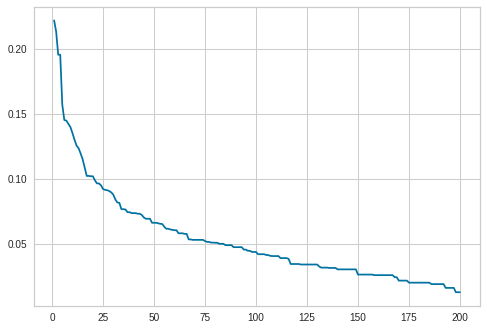

In [41]:
distance = sorted(distances[:, minPts-1], reverse = True)
plt.plot(list(range(1,201)), distance)

명확하게 threshold point가 보이지는 않지만, 어느 정도의 valley는 있기에 valley가 시작되는 부분의 거리인 0.07을 eps로 설정합니다.

eps = 0.07, minPts = 4로 파라미터를 결정했으니 DBSCAN을 실행해봅시다.

####클러스터링 실행

In [42]:
dbscan = DBSCAN(eps = 0.07, min_samples = 4).fit(scaled_data)

In [43]:
## DBSCAN 결과 나온 라벨 값을 데이터에 저장합니다.
scaled_data['Cluster'] = dbscan.labels_

## 어떠한 클러스터가 생성되었는지 살펴봅시다.
scaled_data['Cluster']

0      3
1      0
2      1
3      0
4      3
      ..
195   -1
196   -1
197   -1
198   -1
199   -1
Name: Cluster, Length: 200, dtype: int64

In [44]:
y_db = dbscan.labels_

DBSCAN에서 cluster label이 -1인 데이터는 noise에 해당합니다. 즉, 실제 클러스터 수를 계산할 때에는 -1인 라벨값이 있을 경우 1을 빼줘야 합니다.

In [45]:
# 실제 클러스터 수

cluster_db = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
cluster_db

7

####시각화

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


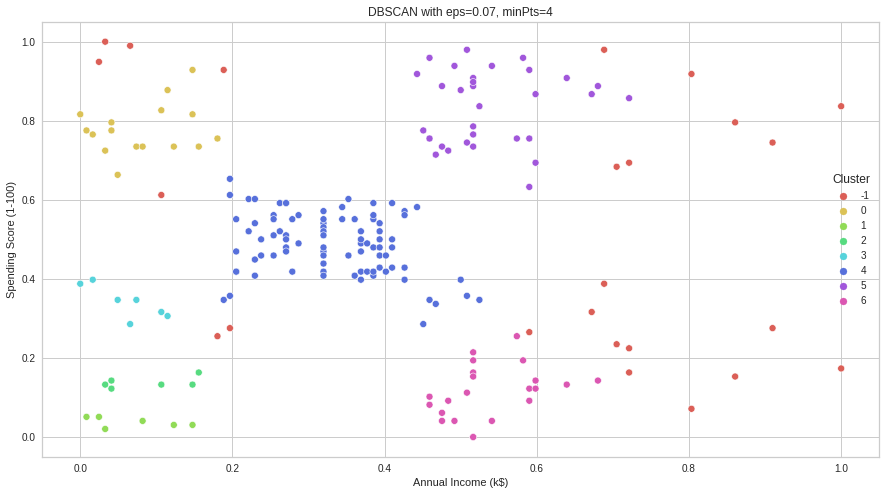

In [46]:
plt.figure(figsize = (15, 8))
sns.scatterplot(scaled_data['Annual Income (k$)'], scaled_data['Spending Score (1-100)'], hue = scaled_data['Cluster'], 
                 palette = sns.color_palette('hls', np.unique(dbscan.labels_).shape[0]))
plt.title('DBSCAN with eps=0.07, minPts=4')
plt.show()

###Validation

실루엣 계수를 활용해 클러스터링의 성능을 비교해봅시다.



---



실루엣 계수 구현은 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html 를 참고해 주세요. 

In [47]:
## 필요한 라이브러리를 임포트합니다.

import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

K-means Clustering의 실루엣 계수입니다.

In [48]:
coef_km = metrics.silhouette_score(data_x, y_km)
print('Silhouette score is {}.'.format(coef_km))

Silhouette score is 0.553931997444648.


Hierarchical Clustering의 실루엣 계수입니다.

In [49]:
## Hierarchical Clustering

coef_hc = metrics.silhouette_score(data_x, y_agghc)
print('Silhouette score is {}.'.format(coef_hc))

Silhouette score is 0.5501569700737704.


DBSCAN의 실루엣 계수입니다.

In [50]:
## DBSCAN

coef_db = metrics.silhouette_score(data_x, y_db)
print('Silhouette score is {}.'.format(coef_db))

Silhouette score is 0.4195404987631818.


어떠한 클러스터링 알고리즘이 성능이 가장 높나요?